Q1

In [1]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Y.append(v.simple_value)
    return X, Y

import argparse
import os

2022-09-12 20:44:47.626983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x = list(range(1, 11))

In [3]:
y = []
for i in x:
    data_path = ""
    logdir = f"hyperparams{i}"
    logdir = os.path.join(data_path, logdir) + "/events*"
    file = glob.glob(logdir)[0]
    steps, avg_ret = get_section_results(file)
    y.append(avg_ret[0])

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


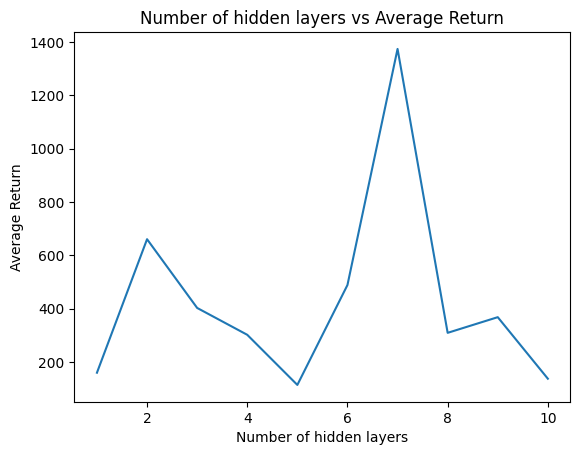

In [4]:
plt.plot(x, y)
plt.xlabel("Number of hidden layers")
plt.ylabel("Average Return")
plt.title("Number of hidden layers vs Average Return")
plt.show();

Q2

In [35]:
def get_section_results_with_attrbs(file, attrb1, attrb2):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    Z = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == attrb1:
                X.append(v.simple_value)
            elif v.tag == attrb2:
                Y.append(v.simple_value)
            elif v.tag == 'Train_AverageReturn':
                Z.append(v.simple_value)
    return X, Y, Z

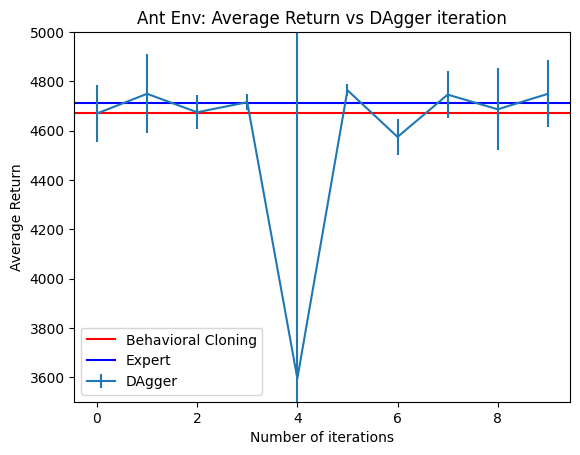

In [64]:
data_path = ""
logdir = f"q2_dagger_ant_Ant-v4_*"
logdir = os.path.join(data_path, logdir) + "/events*"
file = glob.glob(logdir)[0]
X, Y, Z = get_section_results_with_attrbs(file, "Eval_StdReturn", "Eval_AverageReturn")

plt.axhline(y=Y[0], color='r', linestyle='-', label="Behavioral Cloning")
plt.axhline(y=Z[0], color='b', linestyle='-', label="Expert")

n = 10
N = list(range(n))
plt.errorbar(N, Y, X, label="DAgger")
plt.xlabel("Number of iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title("Ant Env: Average Return vs DAgger iteration")
plt.ylim(3500, 5000)
plt.show();

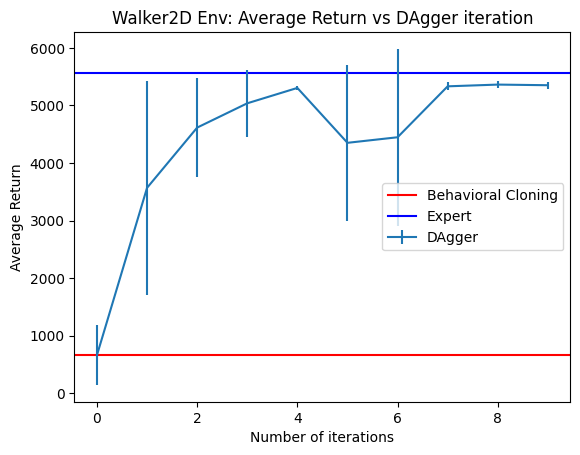

In [66]:
data_path = ""
logdir = f"q2_dagger_walker2d_Walker2d-v4_*"
logdir = os.path.join(data_path, logdir) + "/events*"
file = glob.glob(logdir)[0]
X, Y, Z = get_section_results_with_attrbs(file, "Eval_StdReturn", "Eval_AverageReturn")

plt.axhline(y=Y[0], color='r', linestyle='-', label="Behavioral Cloning")
plt.axhline(y=Z[0], color='b', linestyle='-', label="Expert")

n = 10
N = list(range(n))
plt.errorbar(N, Y, X, label="DAgger")
plt.xlabel("Number of iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title("Walker2D Env: Average Return vs DAgger iteration")
plt.show();